In [ ]:
!pip install --quiet seaborn

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount='True')

Mounted at /content/gdrive


In [ ]:
import numpy
import sklearn
from sklearn import manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#read in the train and test and verify quickly
df_train = pd.read_csv('/content/gdrive/MyDrive/AAA_Project/Masters-Thesis/AAA-Wall/results/3D-BB-AAA-UNet-results/classifier-2022-10-23-20-48/BB-AAA-image/model2/train-OPT.csv')
df_train_P = pd.read_csv('/content/gdrive/MyDrive/AAA_Project/Masters-Thesis/AAA-Wall/results/3D-BB-AAA-UNet-results/classifier-2022-10-23-20-48/BB-AAA-image/model2/train-Pred.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/AAA_Project/Masters-Thesis/AAA-Wall/results/3D-BB-AAA-UNet-results/classifier-2022-10-23-20-48/BB-AAA-image/model2/test-OPT.csv')
df_test_P = pd.read_csv('/content/gdrive/MyDrive/AAA_Project/Masters-Thesis/AAA-Wall/results/3D-BB-AAA-UNet-results/classifier-2022-10-23-20-48/BB-AAA-image/model2/test-Pred.csv')
#label
df_train_P['DATA'] = 'TRAIN'
df_test_P['DATA'] = 'TEST'
#combine
df = pd.concat([df_train_P, df_test_P])
#quick
df2 = pd.read_pickle('/content/gdrive/MyDrive/AAA_Project/Masters-Thesis/AAA-Wall/results/3D-ViT-AAA-results/3D-ViT-classification-2022-10-18-21-43/df_results.pkl')

In [ ]:
#quick check for training
ls1 = df2[df2['DATA'] == 'TRAIN']['Patient'].to_list()
ls2 = df[df['DATA'] == 'TRAIN']['Patient'].to_list()
for ls in ls1:
  if ls not in ls2:
    print(ls)
#quick check for testing
ls1 = df2[df2['DATA'] == 'TEST']['Patient'].to_list()
ls2 = df[df['DATA'] == 'TEST']['Patient'].to_list()
for ls in ls1:
  if ls not in ls2:
    print(ls)

In [ ]:
#get the optimal prediction
def opt_predictions(row, best_train_cutoff):
  if row['prediction'] > best_train_cutoff:
    opt_pred = 1
  else:
    opt_pred = 0
  return opt_pred

In [ ]:
#load the train params back in
def load_params(fpath):
  # Opening JSON file
  with open(fpath) as json_file:
    data = json.load(json_file)
  return data

In [ ]:
train_params = load_params('/content/gdrive/MyDrive/AAA_Project/Masters-Thesis/AAA-Wall/results/3D-BB-AAA-UNet-results/classifier-2022-10-23-20-48/train_params.json')

In [ ]:
#get best based on train
best_train_cutoff = df_train.iloc[0]['Cutoff']
print('Train Set')
display(df_train.head(1)) #manually noted as the same!
#display
display(df_train[df_train['Cutoff'] == 0.5])
#display
print('Test Set')
display(df_test[df_test['Cutoff'] == best_train_cutoff])
#display
display(df_test[df_test['Cutoff'] == 0.5])
#update the df results file and save accordingly, then display the classification performance
df['OPT-Prediction'] = df.apply(opt_predictions, axis = 1, args = (best_train_cutoff, ))
#save
df.to_pickle(train_params['classification_save_path'] + 'BB-AAA-image/' + 'df_classification.pkl')

Train Set


,Cutoff,True Negative,False Positive,False Negative,True Positive,Precision,Negative Predictive Value,Recall,Specificity,F1,Accuracy
0,0.59,27,11,8,27,0.710526,0.771429,0.771429,0.710526,0.739726,0.739726


,Cutoff,True Negative,False Positive,False Negative,True Positive,Precision,Negative Predictive Value,Recall,Specificity,F1,Accuracy
98,0.5,0,38,0,35,0.479452,NaN,1.0,0.0,0.648148,0.479452


Test Set


,Cutoff,True Negative,False Positive,False Negative,True Positive,Precision,Negative Predictive Value,Recall,Specificity,F1,Accuracy
0,0.59,18,7,8,17,0.708333,0.692308,0.68,0.72,0.693878,0.7


,Cutoff,True Negative,False Positive,False Negative,True Positive,Precision,Negative Predictive Value,Recall,Specificity,F1,Accuracy
49,0.5,0,25,0,25,0.5,NaN,1.0,0.0,0.666667,0.5


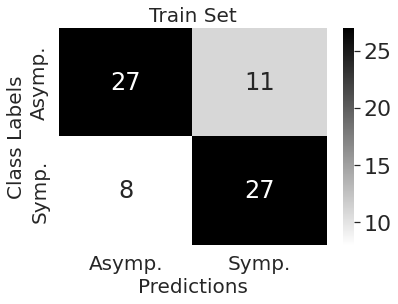

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74        38
         1.0       0.71      0.77      0.74        35

    accuracy                           0.74        73
   macro avg       0.74      0.74      0.74        73
weighted avg       0.74      0.74      0.74        73



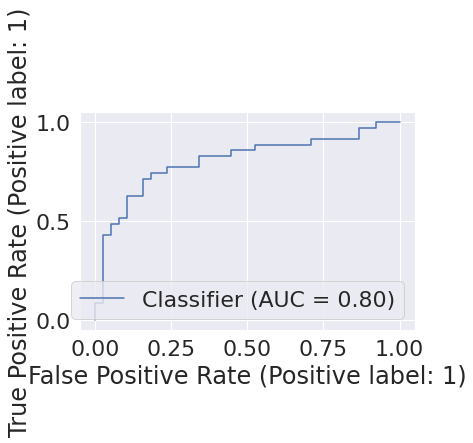

In [ ]:
pred_type = 'OPT-Prediction' # 'prediction' for 0.5 'OPT-Prediction' as informed by training set

#train set performance
train_labels = df[df['DATA'] == 'TRAIN']['label'].to_list()
train_predictions = df[df['DATA'] == 'TRAIN'][pred_type].to_list()
train_pos_predictions = df[df['DATA'] == 'TRAIN']['prediction'].to_list()

#results
plot_confusion_matrix(train_labels, train_predictions, title = 'Train Set', ticks = ['Asymp.', 'Symp.'], 
                      train_params = train_params, pred_type = pred_type)

print(sklearn.metrics.classification_report(train_labels, train_predictions))
#print('ROC-AUC Curve: ', sklearn.metrics.roc_auc_score(train_labels, pos_predictions))
RocCurveDisplay.from_predictions(train_labels, train_pos_predictions)
plt.show()

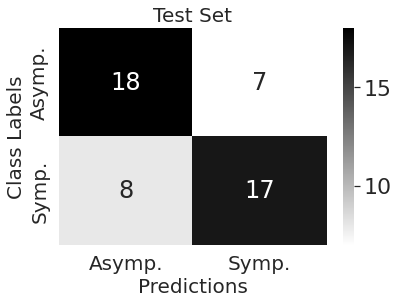

              precision    recall  f1-score   support

         0.0       0.69      0.72      0.71        25
         1.0       0.71      0.68      0.69        25

    accuracy                           0.70        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.70      0.70      0.70        50



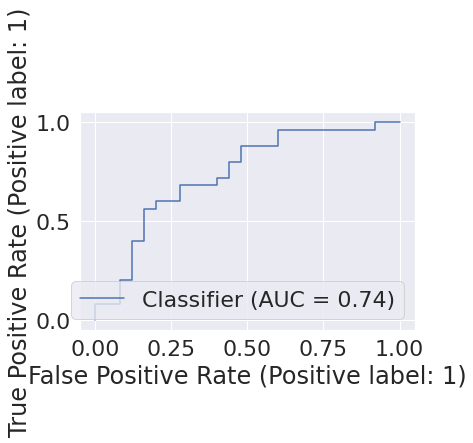

In [ ]:
#test set performance
test_labels = df[df['DATA'] == 'TEST']['label'].to_list()
test_predictions = df[df['DATA'] == 'TEST'][pred_type].to_list()
test_pos_predictions = df[df['DATA'] == 'TEST']['prediction'].to_list()

#results
plot_confusion_matrix(test_labels, test_predictions, title = 'Test Set', ticks = ['Asymp.', 'Symp.'], 
                      train_params = train_params, pred_type = pred_type)
print(sklearn.metrics.classification_report(test_labels, test_predictions))
#print('ROC-AUC Curve: ', sklearn.metrics.roc_auc_score(train_labels, pos_predictions))
RocCurveDisplay.from_predictions(test_labels, test_pos_predictions)
plt.show()